<h3>Exercise</h3>
1. Read in the daily in situ CO2 data with pandas and average over months to compare with the monthly value dataset. Compute and plot the residuals. 

In [1]:
import pandas as pd
import numpy as np

d_data = pd.read_csv('mlo_station_data_set/daily_in_situ_co2_mlo.csv', sep=",",comment='%',header=None, na_values=['    NaN'])
d_data.columns = ['years', 'months','days','CO2','NB','scale']
d_data['dates'] = pd.to_datetime({'year':d_data['years'],'month':d_data['months'],'day':d_data['days']})
d_data.index = d_data['dates'] # A critical step for using resampling
del d_data['years']
del d_data['months']
del d_data['days']
del d_data['NB']
del d_data['scale']
df1 = d_data.resample('M').mean()

In [2]:
m_data = pd.read_csv('mlo_station_data_set/monthly_in_situ_co2_mlo.csv', sep=",",comment='"', skiprows=3,na_values=[-99.99])
days = np.ones([720])
m_data.drop(m_data.index[[0]], inplace=True)
m_data.columns = ['years', 'months','date','decimal date','CO2_1','CO2_2','CO2_3','CO2_4','CO2_5','CO2_6']
m_data.index = pd.to_datetime({'year': m_data['years'], 'month': m_data['months'], 'day':days}) + pd.offsets.MonthEnd(0)
for x in range(578,720):
    m_data.drop(m_data.index[[578]], inplace=True)

m_data['CO2_3'] = pd.to_numeric(m_data['CO2_3'], errors='coerce')
m_data[m_data['CO2_3'] == -99.99] = np.nan

del m_data['years']
del m_data['months']
del m_data['date']
del m_data['decimal date']
del m_data['CO2_1']
del m_data['CO2_2']
del m_data['CO2_4']
del m_data['CO2_5']
del m_data['CO2_6']
df2 = m_data

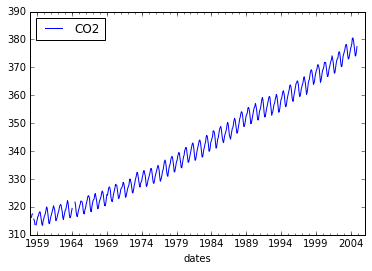

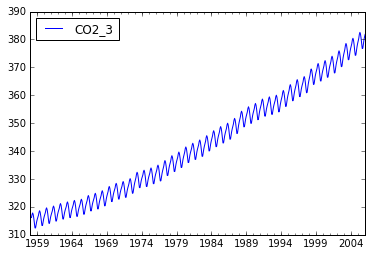

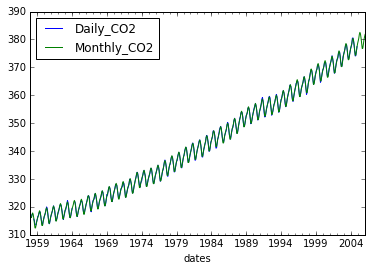

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
df3 = pd.concat([df1, df2.set_index(df1.index[:len(df2)])], axis=1)
df3.columns = ['Daily_CO2','Monthly_CO2']
df1.plot()
df2.plot()
plt.figure(figsize=(40,30)); df3.plot(); plt.legend(loc='best')

 <p2>2. Compute an annual average based on the daily in situ CO2 values and write out a
csv file.</p2>


In [4]:
from datetime import datetime
import pandas as pd
import numpy as np

d_data = pd.read_csv('mlo_station_data_set/daily_in_situ_co2_mlo.csv', sep=",",comment='%',header=None, na_values=['    NaN'])
d_data.columns = ['years', 'months','days','CO2','NB','scale']
d_data['dates'] = pd.to_datetime({'year':d_data['years'],'month':d_data['months'],'day':d_data['days']})
d_data.index = d_data['dates'] # A critical step for using resampling
del d_data['years']
del d_data['months']
del d_data['days']
del d_data['NB']
del d_data['scale']
df4 = d_data.resample('A').mean()
df4.to_csv('out.csv', na_rep = 'NaN')

<p>3. Load in the file called geneds json.txt with the pd.read json( ) function. Print
the file to figure out the number of columns and column names. 
Which GenEdcourse at the University of Illinois has the greatest average GPA? <br> (Hint: Use the
sort values( ) function, or data.loc[data[’avg gpa’].idxmax( )] ) in the cell below demonstrates how you can calculate a mean for an entire table of
data for a nontrivial case.


In [5]:
import pandas as pd
data = pd.read_json('geneds_json.txt')

In [6]:
a = str(data['GenedRequirement'][data['avg_gpa'].idxmax( )]).lstrip('[').rstrip(']')
b = data['Total'][data['avg_gpa'].idxmax( )]
c = data['avg_gpa'][data['avg_gpa'].idxmax( )]
d = data['compre'][data['avg_gpa'].idxmax( )]
e = data['name'][data['avg_gpa'].idxmax( )]
f = float(data['pct_As'][data['avg_gpa'].idxmax( )])*100
g = data['title'][data['avg_gpa'].idxmax( )]
print('Class Title      : %s' %(g))
print('Class Number     : %s' %(e))
print('GenedRequirement : %s' %a)
print('Average GPA      : %s' %c)
print('Class perc. A\'s  : %f %%'%f)


Class Title      : Contemporary Korean Society
Class Number     : EALC 365
GenedRequirement : 'Non-Western Culture', 'Social & Behavioral Sciences'
Average GPA      : 3.98365853659
Class perc. A's  : 97.560976 %


<p>4. Explain what each line of the following code does. (Note that this code is in your notebook as well.)</p>

In [7]:
import pandas as pd

<p1>Import and load pandas into your namespace </p1>

In [8]:
fname = 'geneds_json.txt'

<p2>Assign fname to 'gened_json.txt' </p2>

In [9]:
s = data.apply(lambda x: pd.Series(x['GenedRequirement']),axis=1).stack().reset_index(level=1, drop=True)

1) Breaks the ['GenedRequirement'] column into the individual general education requirements <br>
2) Reorganizes the two columns into one column based on the second 'GenedRequirement' <br>
3) Reindexes the entire column to create a new column listing each 'GenedRequirement' <b>

In [10]:
s.name = 'GenedRequirement'

naming the data frame s as 'GenedRequirement'

In [11]:
new = data.drop('GenedRequirement', axis=1).join(s)

Drop the column 'GenedRequirement' then join dataframe s. <br>
Note that dataframe s have a new 'GenedRequirement' that have been reindexed

In [12]:
new.groupby(['GenedRequirement']).mean()

,Total,avg_gpa,compre,pct_As
GenedRequirement,,,,
Advanced Composition,245.058824,3.422309,0.640070,0.424564
Humanities & the Arts,224.790323,3.357140,0.613929,0.388573
Natural Science & Technology,1355.483871,3.169332,0.588273,0.384213
Non-Western Culture,216.828571,3.377348,0.632288,0.420239
Quantitative Reasoning,1254.686567,3.087739,0.554821,0.337707
Social & Behavioral Sciences,599.099099,3.333429,0.630614,0.427871
Western/Comparative Culture,292.858586,3.365834,0.625333,0.409208


Group by the term 'GenedRequirement' and find the mean for each column 